<a href="https://colab.research.google.com/github/sud-36/facial-emotion-recognition/blob/main/notebooks_train_fer2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.copytree('/content/drive/MyDrive/FER_project', '/content/FER_project', dirs_exist_ok=True)

'/content/FER_project'

In [ ]:
train_path = '/content/FER_project/train'
test_path = '/content/FER_project/test'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

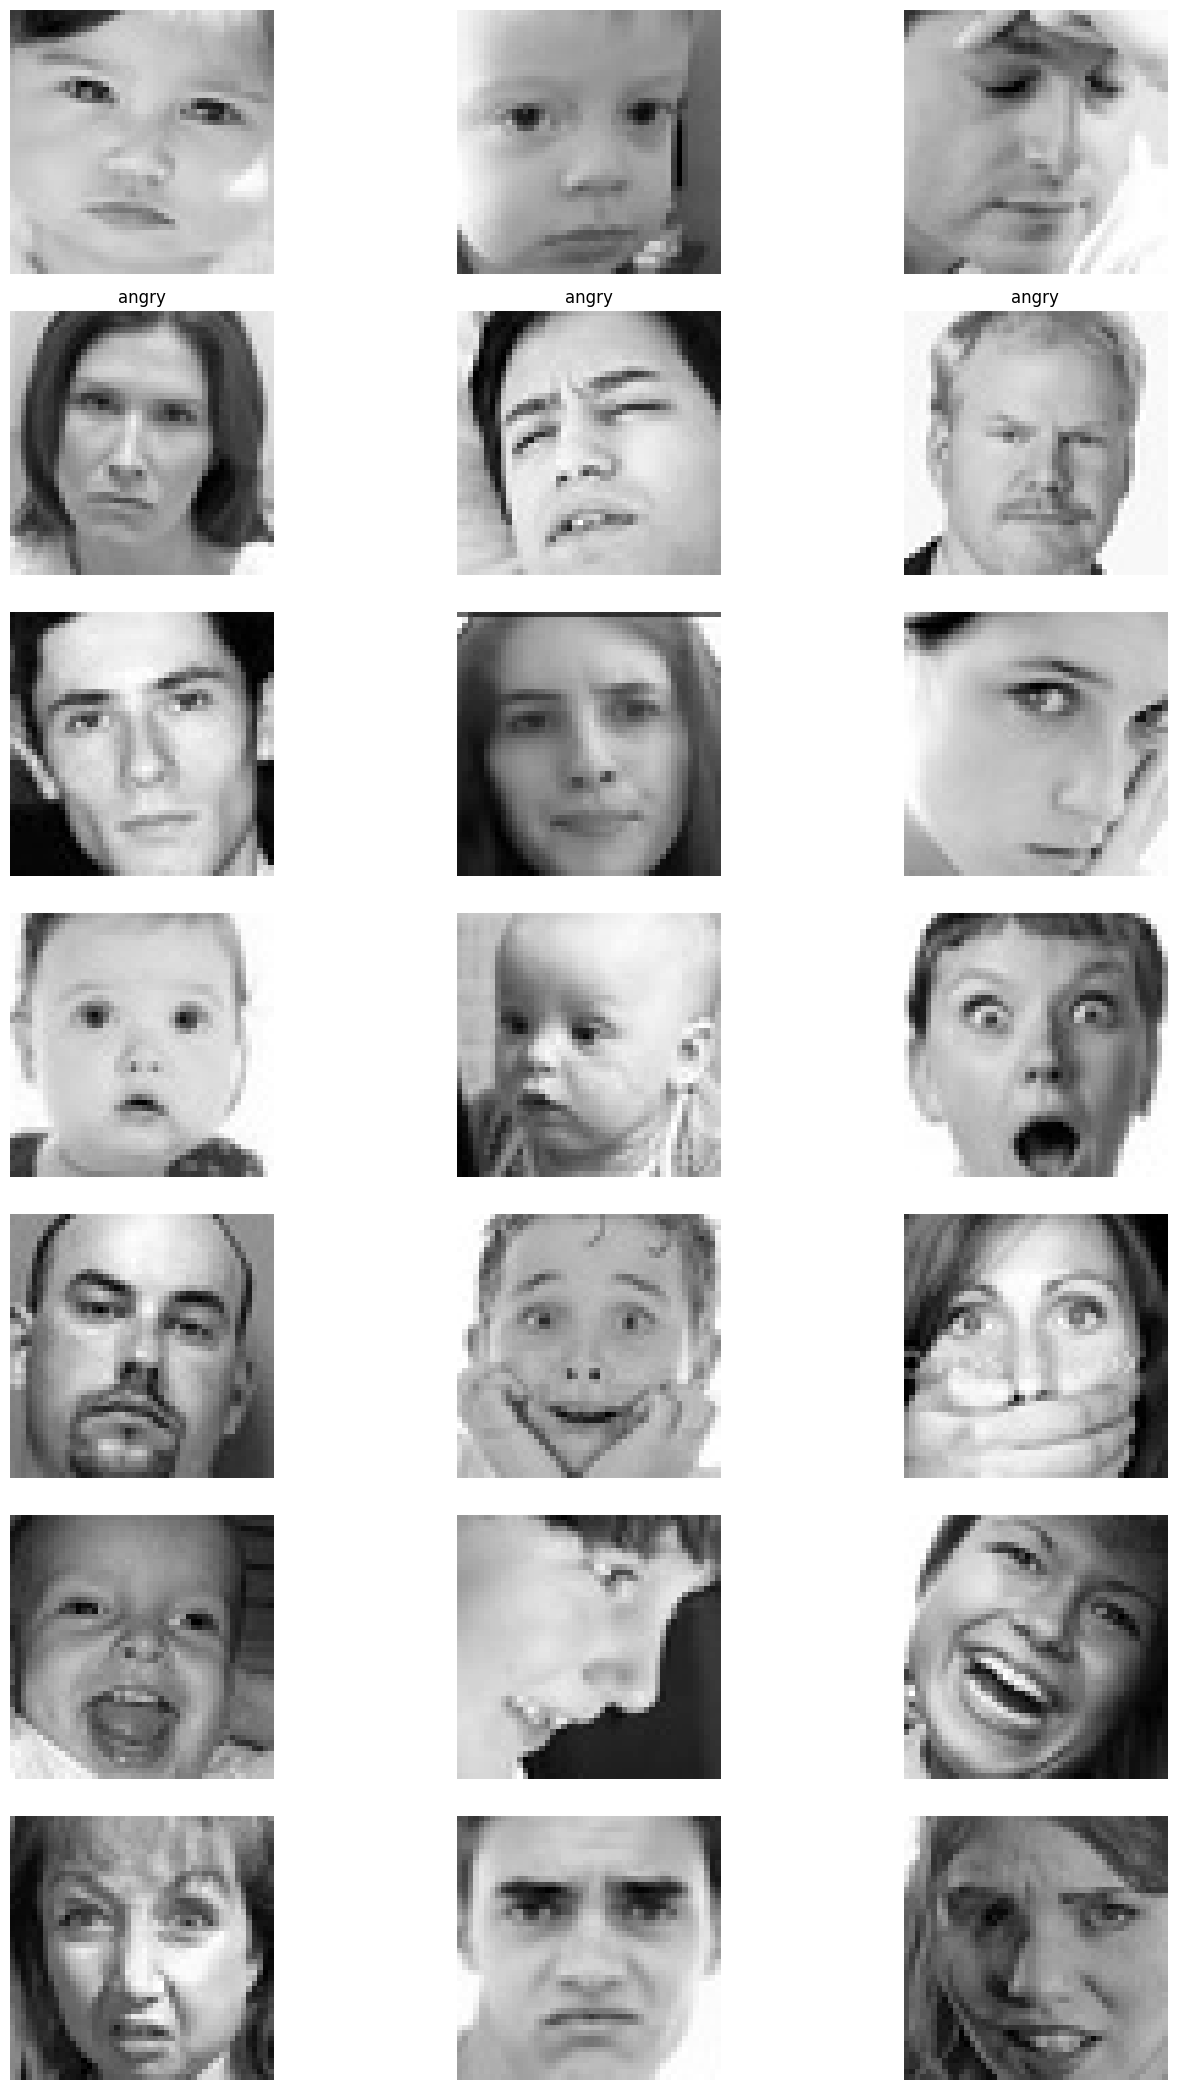

In [ ]:
classes = os.listdir(train_path)
num_images = 3

plt.figure(figsize=(15, len(classes) * 3))

for i, emotion in enumerate(classes):
  class_folder = os.path.join(train_path, emotion)
  images = os.listdir(class_folder)

  random_images = random.sample(images, num_images)

  for j, img_name in enumerate(random_images):
    img_path = os.path.join(class_folder, img_name)
    img = load_img(img_path, color_mode='grayscale', target_size=(48, 48))
    array = img_to_array(img)

    plt.subplot(len(classes), num_images, i * num_images + j + 1)
    plt.imshow(array.squeeze(), cmap='gray')

    if (i == 1):
      plt.title(emotion)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (48,48),
    color_mode = 'grayscale',
    batch_size = 64,
    class_mode = 'categorical',
    shuffle = True
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (48,48),
    color_mode = 'grayscale',
    batch_size = 64,
    class_mode = 'categorical',
    shuffle = False
)


Found 28736 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
train_generator.classes[:20]
train_generator.num_classes

7

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential([
    #First Layer
    Conv2D(32,(3,3),activation='relu', input_shape = (48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #Second Layer
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #Third Layer
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),

    #Fourth Layer
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    #Fifth Layer
    Dense(256, activation='relu'),
    Dropout(0.4),

    #Sixth Layer (Output)
    Dense(7, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,631 (2.05 MB)

 Trainable params: 537,927 (2.05 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from IPython.core import history
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_generator,
    epochs = 25,
    validation_data = test_generator
)

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.2694 - loss: 2.0101 - val_accuracy: 0.2548 - val_loss: 1.7781
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.3835 - loss: 1.5753 - val_accuracy: 0.4203 - val_loss: 1.5123
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4418 - loss: 1.4487 - val_accuracy: 0.4547 - val_loss: 1.4213
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4735 - loss: 1.3739 - val_accuracy: 0.4441 - val_loss: 1.4520
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4992 - loss: 1.3164 - val_accuracy: 0.5287 - val_loss: 1.2226
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5099 - loss: 1.2876 - val_accuracy: 0.4737 - val_loss: 1.3622
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5307 - loss: 1.2561 - val_accuracy: 0.5202 - val_loss: 1.2784
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5430 - loss: 1.2231 - val_accurac

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5250 - loss: 1.3465
Test Loss: 1.1906769275665283, Test Accuracy: 0.5713290572166443


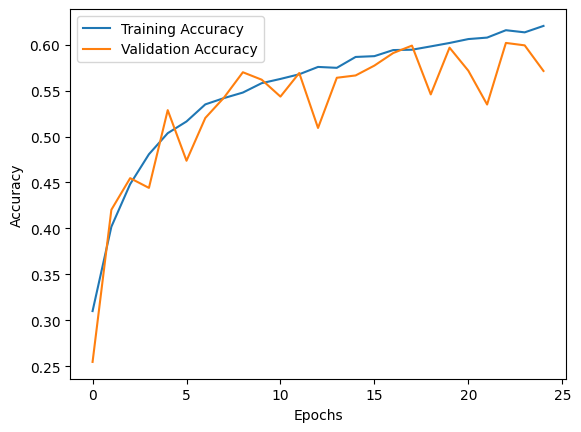

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

preds = model.predict(test_generator)
pred_labels = np.argmax(preds, axis=1)
true_labels = test_generator.classes

cm = confusion_matrix(true_labels, pred_labels)
print('Confusion Matrix:')
print(cm)

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
Confusion Matrix:
[[ 429   12  107  118  121  118   53]
 [  44   23    8   17    3   12    4]
 [  94    7  369  148   95  145  166]
 [  22    1   26 1588   49   31   57]
 [  48    4  131  237  609  125   79]
 [  93    7  222  210  226  445   44]
 [  14    0   63   82   18   16  638]]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)

{0: np.float64(1.023471168572141), 1: np.float64(9.415465268676277), 2: np.float64(1.0019875169985006), 3: np.float64(0.5689733689733689), 4: np.float64(0.8268162854265574), 5: np.float64(0.8499260573794736), 6: np.float64(1.2901140343000808)}


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import regularizers

In [ ]:
model2 = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same',
           kernel_regularizer=regularizers.l2(1e-4),
           input_shape=(48,48,1)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),


    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),


    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),


    GlobalAveragePooling2D(),


    Dense(256, activation='relu'),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(7, activation='softmax')
])
model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,247,431 (4.76 MB)

 Trainable params: 1,245,639 (4.75 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

es = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history2 = model2.fit(
    train_generator,
    epochs = 36,
    validation_data = test_generator,
    class_weight = class_weights_dict,
    callbacks = [checkpoint, es, lr_callback]
)

Epoch 1/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1591 - loss: 2.0286
Epoch 1: val_accuracy improved from -inf to 0.01574, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - accuracy: 0.1591 - loss: 2.0284 - val_accuracy: 0.0157 - val_loss: 2.0992 - learning_rate: 0.0010
Epoch 2/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1942 - loss: 1.8684
Epoch 2: val_accuracy improved from 0.01574 to 0.21482, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.1942 - loss: 1.8683 - val_accuracy: 0.2148 - val_loss: 1.8748 - learning_rate: 0.0010
Epoch 3/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2813 - loss: 1.7399
Epoch 3: val_accuracy improved from 0.21482 to 0.29730, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.2813 - loss: 1.7399 - val_accuracy: 0.2973 - val_loss: 1.8109 - learning_rate: 0.0010
Epoch 4/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3502 - loss: 1.6536
Epoch 4: val_accuracy improved from 0.29730 to 0.41822, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.3502 - loss: 1.6536 - val_accuracy: 0.4182 - val_loss: 1.5047 - learning_rate: 0.0010
Epoch 5/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4143 - loss: 1.5240
Epoch 5: val_accuracy did not improve from 0.41822
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.4143 - loss: 1.5240 - val_accuracy: 0.3915 - val_loss: 1.5493 - learning_rate: 0.0010
Epoch 6/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4344 - loss: 1.4630
Epoch 6: val_accuracy improved from 0.41822 to 0.45319, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.4345 - loss: 1.4629 - val_accuracy: 0.4532 - val_loss: 1.4160 - learning_rate: 0.0010
Epoch 7/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4675 - loss: 1.3812
Epoch 7: val_accuracy improved from 0.45319 to 0.47228, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4675 - loss: 1.3812 - val_accuracy: 0.4723 - val_loss: 1.3417 - learning_rate: 0.0010
Epoch 8/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4912 - loss: 1.3167
Epoch 8: val_accuracy did not improve from 0.47228
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.4912 - loss: 1.3167 - val_accuracy: 0.4703 - val_loss: 1.3945 - learning_rate: 0.0010
Epoch 9/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5059 - loss: 1.2778
Epoch 9: val_accuracy improved from 0.47228 to 0.50933, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5059 - loss: 1.2778 - val_accuracy: 0.5093 - val_loss: 1.2951 - learning_rate: 0.0010
Epoch 10/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5196 - loss: 1.2544
Epoch 10: val_accuracy improved from 0.50933 to 0.54152, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5196 - loss: 1.2544 - val_accuracy: 0.5415 - val_loss: 1.1780 - learning_rate: 0.0010
Epoch 11/36
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5237 - loss: 1.2327
Epoch 11: val_accuracy did not improve from 0.54152
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.5237 - loss: 1.2327 - val_accuracy: 0.4556 - val_loss: 1.4385 - learning_rate: 0.0010
Epoch 12/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5296 - loss: 1.2276
Epoch 12: val_accuracy improved from 0.54152 to 0.55155, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5296 - loss: 1.2276 - val_accuracy: 0.5515 - val_loss: 1.1609 - learning_rate: 0.0010
Epoch 13/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5464 - loss: 1.1612
Epoch 13: val_accuracy did not improve from 0.55155
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.5464 - loss: 1.1612 - val_accuracy: 0.5422 - val_loss: 1.2169 - learning_rate: 0.0010
Epoch 14/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5441 - loss: 1.1615
Epoch 14: val_accuracy improved from 0.55155 to 0.56938, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.5441 - loss: 1.1615 - val_accuracy: 0.5694 - val_loss: 1.1306 - learning_rate: 0.0010
Epoch 15/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5585 - loss: 1.1489
Epoch 15: val_accuracy improved from 0.56938 to 0.58679, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5585 - loss: 1.1489 - val_accuracy: 0.5868 - val_loss: 1.0836 - learning_rate: 0.0010
Epoch 16/36
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5744 - loss: 1.1109
Epoch 16: val_accuracy did not improve from 0.58679
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5744 - loss: 1.1110 - val_accuracy: 0.5829 - val_loss: 1.1047 - learning_rate: 0.0010
Epoch 17/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5730 - loss: 1.0858
Epoch 17: val_accuracy did not improve from 0.58679
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.5730 - loss: 1.0859 - val_accuracy: 0.5504 - val_loss: 1.2173 - learning_rate: 0.0010
Epoch 18/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5785 - loss: 1.0892
Epoch 18: val_accuracy did not improve from 0.58679

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.5784 - loss: 1.

449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5819 - loss: 1.0362 - val_accuracy: 0.6113 - val_loss: 1.0034 - learning_rate: 1.0000e-04
Epoch 20/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6032 - loss: 1.0009
Epoch 20: val_accuracy improved from 0.61131 to 0.61159, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.6032 - loss: 1.0009 - val_accuracy: 0.6116 - val_loss: 1.0032 - learning_rate: 1.0000e-04
Epoch 21/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6146 - loss: 0.9727
Epoch 21: val_accuracy improved from 0.61159 to 0.61340, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.6146 - loss: 0.9727 - val_accuracy: 0.6134 - val_loss: 0.9979 - learning_rate: 1.0000e-04
Epoch 22/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6078 - loss: 0.9748
Epoch 22: val_accuracy improved from 0.61340 to 0.62037, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.6078 - loss: 0.9749 - val_accuracy: 0.6204 - val_loss: 0.9935 - learning_rate: 1.0000e-04
Epoch 23/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6082 - loss: 0.9764
Epoch 23: val_accuracy did not improve from 0.62037
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.6082 - loss: 0.9764 - val_accuracy: 0.6198 - val_loss: 0.9943 - learning_rate: 1.0000e-04
Epoch 24/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6125 - loss: 0.9745
Epoch 24: val_accuracy improved from 0.62037 to 0.62176, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.6125 - loss: 0.9745 - val_accuracy: 0.6218 - val_loss: 0.9974 - learning_rate: 1.0000e-04
Epoch 25/36
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6190 - loss: 0.9468
Epoch 25: val_accuracy improved from 0.62176 to 0.62608, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.6190 - loss: 0.9468 - val_accuracy: 0.6261 - val_loss: 0.9791 - learning_rate: 1.0000e-04
Epoch 26/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6207 - loss: 0.9357
Epoch 26: val_accuracy did not improve from 0.62608
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.6207 - loss: 0.9357 - val_accuracy: 0.6251 - val_loss: 0.9877 - learning_rate: 1.0000e-04
Epoch 27/36
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6167 - loss: 0.9547
Epoch 27: val_accuracy improved from 0.62608 to 0.62817, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.6167 - loss: 0.9547 - val_accuracy: 0.6282 - val_loss: 0.9822 - learning_rate: 1.0000e-04
Epoch 28/36
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6249 - loss: 0.9355
Epoch 28: val_accuracy improved from 0.62817 to 0.63026, saving model to best_model.h5



Epoch 28: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.6249 - loss: 0.9355 - val_accuracy: 0.6303 - val_loss: 0.9836 - learning_rate: 1.0000e-04
Epoch 29/36
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6230 - loss: 0.9388
Epoch 29: val_accuracy improved from 0.63026 to 0.63096, saving model to best_model.h5


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.6230 - loss: 0.9388 - val_accuracy: 0.6310 - val_loss: 0.9811 - learning_rate: 1.0000e-05
Epoch 30/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6316 - loss: 0.9174
Epoch 30: val_accuracy did not improve from 0.63096
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.6316 - loss: 0.9174 - val_accuracy: 0.6304 - val_loss: 0.9799 - learning_rate: 1.0000e-05
Epoch 31/36
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6241 - loss: 0.9262
Epoch 31: val_accuracy did not improve from 0.63096

Epoch 31: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.6241 - loss: 0.9262 - val_accuracy: 0.6279 - val_loss: 0.9814 - learning_rate: 1.0000e-05
Epoch 31: early stopping
Restoring model weights from the end of the best epoch: 25.


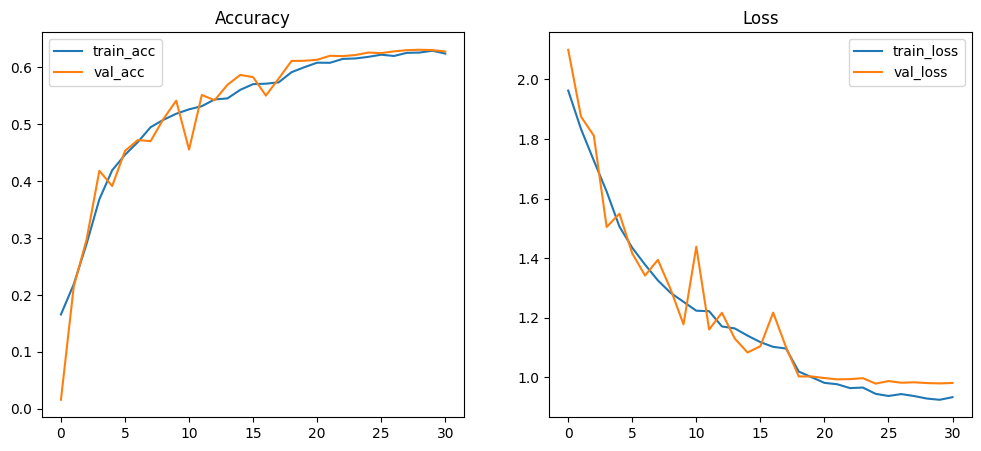

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='train_acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.legend()

plt.show()

In [ ]:
# Predictions
y_pred = model2.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Labels
class_names = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_labels, target_names=class_names))

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step
              precision    recall  f1-score   support

       angry       0.53      0.57      0.55       958
     disgust       0.45      0.72      0.56       111
        fear       0.53      0.24      0.33      1024
       happy       0.89      0.82      0.85      1774
     neutral       0.53      0.71      0.61      1233
         sad       0.51      0.50      0.51      1247
    surprise       0.66      0.82      0.74       831

    accuracy                           0.63      7178
   macro avg       0.59      0.62      0.59      7178
weighted avg       0.63      0.63      0.62      7178



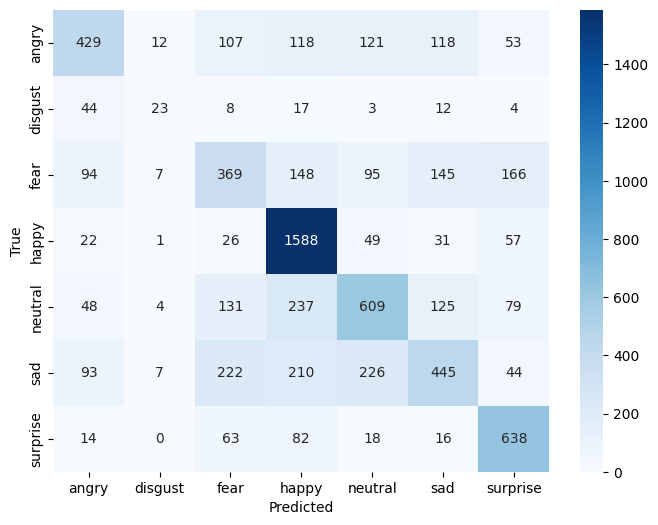

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
!mkdir -p /content/drive/MyDrive/FER_project/model

In [ ]:
!cp best_model.h5 /content/drive/MyDrive/FER_project/model/best_model.h5